# **LOAD DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/ML"

In [ ]:
%cd /content/gdrive/My Drive/ML


/content/gdrive/My Drive/ML


In [ ]:
!ls

 animals10.zip	 model.h5	'model-raw-img (1)'   translate.py
 kaggle.json	 model-raw-img	 raw-img


In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

401 - Unauthorized


In [ ]:
!ls

 animals10.zip	 model.h5	'model-raw-img (1)'   translate.py
 kaggle.json	 model-raw-img	 raw-img


In [ ]:
import pandas as pd
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import tensorflow as tf
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm.notebook import tqdm as tq
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Ekstrak dataset

local_zip = '/content/gdrive/My Drive/ML/animals10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/My Drive/ML')
zip_ref.close()

In [ ]:
import os
from PIL import Image
base_dataset = "/content/gdrive/My Drive/ML/raw-img"
class_dir = ['scoiattolo','ragno','pecora','mucca','gatto','gallina','farfalla','elefante','cavallo','cane']
for class_item in class_dir:
  cur_dir = base_dataset + '/' + class_item + '/'
  dataset = os.listdir(cur_dir)
  for item in dataset :
    im = Image.open(f"{cur_dir}{item}")
    if item.endswith('.jpg'):
      if im.mode == "CMYK":
        im.convert('RGB')
      else :
        im.save(f"{cur_dir}{item.split('.')[0]}.png", "png")
    else :
      im.save(f"{cur_dir}{item.split('.')[0]}.png", "png")
  for item in dataset :
    if not item.endswith('.png'):
      os.remove(os.path.join(cur_dir, item))

# **SPLITTING**

In [ ]:

file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(base_dataset):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [ ]:
# membuat dataframe dari variabel baru
data = pd.DataFrame({'path':full_path,'file_name':file_name,'tag':tag})
data.groupby(['tag']).size()

tag
cane          4863
cavallo       2623
elefante      1445
farfalla      2112
gallina       3098
gatto         1668
mucca         1866
pecora        1820
ragno         4821
scoiattolo    1862
dtype: int64

In [ ]:
x = data['path']
y = data['tag']

In [ ]:
#Pertama
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.20, random_state=1)
#Kedua
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.01, random_state=1)

In [ ]:
# menyatukan ke dalam masing-masing dataframe
data_tr = pd.DataFrame({'path':X_train, 'tag':y_train, 'set':'training'})

data_val = pd.DataFrame({'path':X_val, 'tag':y_val, 'set':'validation'})

data_ts = pd.DataFrame({'path':X_test, 'tag':y_test, 'set':'test'})

In [ ]:
print('train size', len(data_tr))
print('val size', len(data_val))
print('test size', len(data_ts))

train size 20942
val size 5183
test size 53


In [ ]:
#1.3 cek penamaan image 
dataset_path = '/content/gdrive/My Drive/ML/model-raw-img'

data_all = data_tr.append([data_tr, data_val , data_ts]).reset_index(drop=1)

for index, row in tq(data_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(base_dataset,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

In [ ]:
scoiattolo_test = "/content/gdrive/My Drive/ML/model-raw-img/test/scoiattolo"
scoiattolo_train = "/content/gdrive/My Drive/ML/model-raw-img/training/scoiattolo"
scoiattolo_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/scoiattolo"
ragno_test = "/content/gdrive/My Drive/ML/model-raw-img/test/ragno"
ragno_train = "/content/gdrive/My Drive/ML/model-raw-img/training/ragno"
ragno_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/ragno"
pecora_test = "/content/gdrive/My Drive/ML/model-raw-img/test/pecora"
pecora_train = "/content/gdrive/My Drive/ML/model-raw-img/training/pecora"
pecora_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/pecora"
mucca_test = "/content/gdrive/My Drive/ML/model-raw-img/test/mucca"
mucca_train = "/content/gdrive/My Drive/ML/model-raw-img/training/mucca"
mucca_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/mucca"
gatto_test = "/content/gdrive/My Drive/ML/model-raw-img/test/gatto"
gatto_train = "/content/gdrive/My Drive/ML/model-raw-img/training/gatto"
gatto_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/gatto"
gallina_test = "/content/gdrive/My Drive/ML/model-raw-img/test/gallina"
gallina_train = "/content/gdrive/My Drive/ML/model-raw-img/training/gallina"
gallina_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/gallina"
farfalla_test = "/content/gdrive/My Drive/ML/model-raw-img/test/farfalla"
farfalla_train = "/content/gdrive/My Drive/ML/model-raw-img/training/farfalla"
farfalla_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/farfalla"
elefante_test = "/content/gdrive/My Drive/ML/model-raw-img/test/elefante"
elefante_train = "/content/gdrive/My Drive/ML/model-raw-img/training/elefante"
elefante_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/elefante"
cavallo_test = "/content/gdrive/My Drive/ML/model-raw-img/test/cavallo"
cavallo_train = "/content/gdrive/My Drive/ML/model-raw-img/training/cavallo"
cavallo_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/cavallo"
cane_test = "/content/gdrive/My Drive/ML/model-raw-img/test/cane"
cane_train = "/content/gdrive/My Drive/ML/model-raw-img/training/cane"
cane_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/cane"

file_test_sco = os.listdir(scoiattolo_test)
file_train_sco = os.listdir(scoiattolo_train)
file_Val_sco = os.listdir(scoiattolo_validation)
file_test_rag = os.listdir(ragno_test)
file_train_rag = os.listdir(ragno_train)
file_Val_rag = os.listdir(ragno_validation)
file_test_pec = os.listdir(pecora_test)
file_train_pec = os.listdir(pecora_train)
file_Val_pec = os.listdir(pecora_validation)
file_test_muc = os.listdir(mucca_test)
file_train_muc = os.listdir(mucca_train)
file_Val_muc = os.listdir(mucca_validation)
file_test_gat = os.listdir(gatto_test)
file_train_gat = os.listdir(gatto_train)
file_Val_gat = os.listdir(gatto_validation)
file_test_gal = os.listdir(gallina_test)
file_train_gal = os.listdir(gallina_train)
file_Val_gal = os.listdir(gallina_validation)
file_test_far = os.listdir(farfalla_test)
file_train_far = os.listdir(farfalla_train)
file_Val_far = os.listdir(farfalla_validation)
file_test_ele = os.listdir(elefante_test)
file_train_ele = os.listdir(elefante_train)
file_Val_ele = os.listdir(elefante_validation)
file_test_cav = os.listdir(cavallo_test)
file_train_cav = os.listdir(cavallo_train)
file_Val_cav = os.listdir(cavallo_validation)
file_test_can = os.listdir(cane_test)
file_train_can = os.listdir(cane_train)
file_Val_can = os.listdir(cane_validation)

print("data scoiattolo test : " + str(len(file_test_sco)))
print("data scoiattolo train : " + str(len(file_train_sco)))
print("data scoiattolo validation : " + str(len(file_Val_sco)))
print("data ragno test : " + str(len(file_test_rag)))
print("data ragno train : " + str(len(file_train_rag)))
print("data ragno validation : " + str(len(file_Val_rag)))
print("data pecora test : " + str(len(file_test_pec)))
print("data pecora train : " + str(len(file_train_pec)))
print("data pecora validation : " + str(len(file_Val_pec)))
print("data mucca test : " + str(len(file_test_muc)))
print("data mucca train : " + str(len(file_train_muc)))
print("data mucca validation : " + str(len(file_Val_muc)))
print("data gatto test : " + str(len(file_test_gat)))
print("data gatto train : " + str(len(file_train_gat)))
print("data gatto validation : " + str(len(file_Val_gat)))
print("data gallina test : " + str(len(file_test_gal)))
print("data gallina train : " + str(len(file_train_gal)))
print("data gallina validation : " + str(len(file_Val_gal)))
print("data farfalla test : " + str(len(file_test_far)))
print("data farfalla train : " + str(len(file_train_far)))
print("data farfalla validation : " + str(len(file_Val_far)))
print("data elefante test : " + str(len(file_test_ele)))
print("data elefante train : " + str(len(file_train_ele)))
print("data elefante validation : " + str(len(file_Val_ele)))
print("data cavallo test : " + str(len(file_test_cav)))
print("data cavallo train : " + str(len(file_train_cav)))
print("data cavallo validation : " + str(len(file_Val_cav)))
print("data cane test : " + str(len(file_test_can)))
print("data cane train : " + str(len(file_train_can)))
print("data cane validation : " + str(len(file_Val_can)))

data scoiattolo test : 2
data scoiattolo train : 1761
data scoiattolo validation : 834
data ragno test : 11
data ragno train : 4545
data ragno validation : 2074
data pecora test : 2
data pecora train : 1711
data pecora validation : 824
data mucca test : 2
data mucca train : 1768
data mucca validation : 794
data gatto test : 2
data gatto train : 1578
data gatto validation : 743
data gallina test : 7
data gallina train : 2920
data gallina validation : 1348
data farfalla test : 5
data farfalla train : 1973
data farfalla validation : 961
data elefante test : 4
data elefante train : 1362
data elefante validation : 646
data cavallo test : 4
data cavallo train : 2473
data cavallo validation : 1125
data cane test : 14
data cane train : 4560
data cane validation : 2171


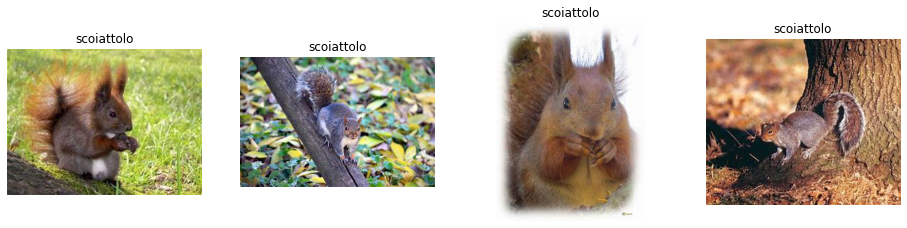

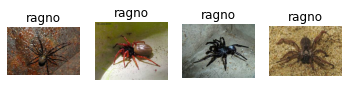

In [ ]:
nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_sco_pix = [os.path.join(scoiattolo_train, fname)
                 for fname in os.listdir(scoiattolo_train)[:4]]
next_rag_pix = [os.path.join(ragno_train, fname)
                 for fname in os.listdir(ragno_train)[:4]]    

for i, img_path in enumerate(next_sco_pix):
  sp = plt.subplot(2,4, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.title('scoiattolo')
  plt.imshow(img)
plt.show()

for i, img_path in enumerate(next_rag_pix):
  sp = plt.subplot(2,4, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.title('ragno')
  plt.imshow(img)
plt.show()

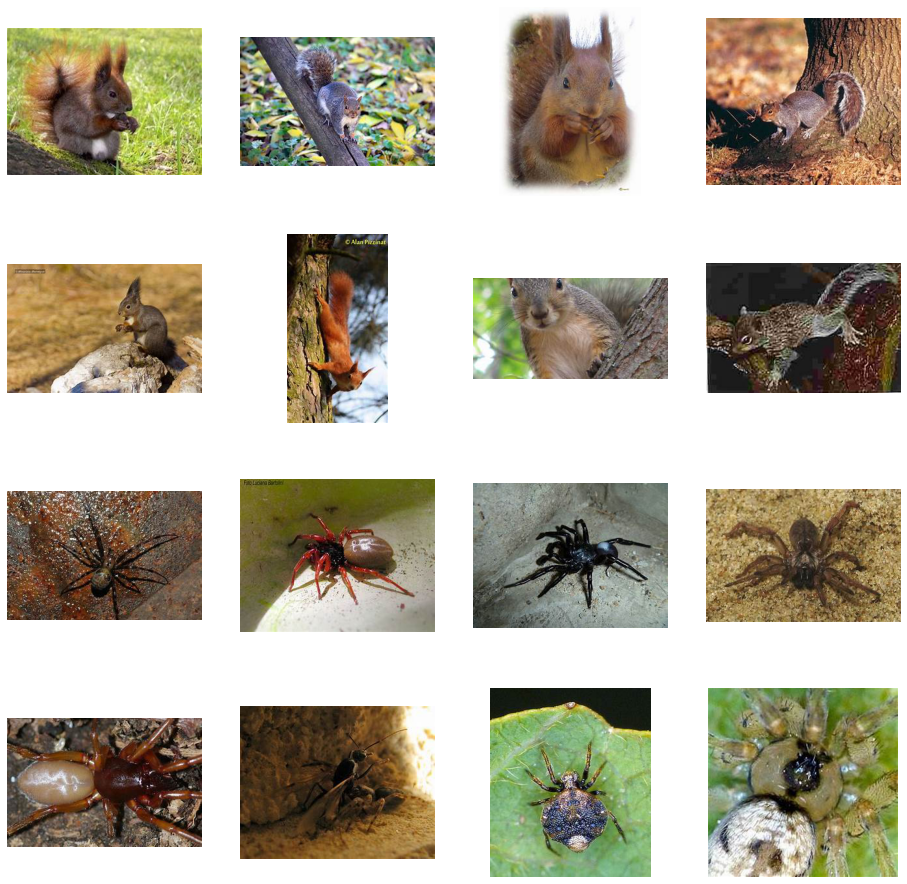

In [ ]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_sco_pix = [os.path.join(scoiattolo_train, fname) 
                for fname in os.listdir(scoiattolo_train)[pic_index-8:pic_index]]
next_rag_pix = [os.path.join(ragno_train, fname) 
                for fname in os.listdir(ragno_train)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_sco_pix+next_rag_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# **PREPROCESSING**

In [ ]:
import os
import cv2
import numpy as np

# Gather data test
test_data = []
test_label = []

test_dir='/content/gdrive/My Drive/ML/model-raw-img/test'
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir='/content/gdrive/My Drive/ML/model-raw-img/training'
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

KeyboardInterrupt: ignored

In [ ]:
# Gather data validation
val_data = []
val_label = []

vali_dir='/content/gdrive/My Drive/ML/model-raw-img/validation'
for r, d, f in os.walk(vali_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

KeyboardInterrupt: ignored

In [ ]:
print('Data Training Shape : ', train_data.shape)
print('Data Validation Shape : ', val_data.shape)
print('Data Test Shape : ', test_data.shape)

Data Training Shape :  (24651, 100, 100, 3)
Data Validation Shape :  (24651, 100, 100, 3)
Data Test Shape :  (53, 100, 100, 3)


In [ ]:
# Tampilan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (24651, 100, 100, 3)
Train Label =  (24651,)
Validation Data =  (24651, 100, 100, 3)
Validation Label =  (24651,)
Test Data =  (53, 100, 100, 3)
Test Label =  (53,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [20 92 54]
Data setelah di-normalisasi  [0.07843138 0.36078432 0.21176471]


In [ ]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['cane' 'cane' 'cane' 'cane' 'cane' 'cane' 'cane' 'cane' 'cane' 'cane']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


# **AUGMENTASI**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
input_shape = (200, 200)

train = '/content/gdrive/MyDrive/ML/model-raw-img/training'
train_generator = datagen.flow_from_directory(train, 
                                                    target_size=input_shape,
                                                    class_mode ='categorical',
                                                    batch_size = 32,
                                                    color_mode ='rgb',
                                                    shuffle = True) 

validation = '/content/gdrive/MyDrive/ML/model-raw-img/validation'
validation_generator = datagen.flow_from_directory(validation,
                                                        target_size=input_shape,
                                                        class_mode ='categorical',
                                                        color_mode ='rgb',
                                                        batch_size = 32,
                                                        shuffle = True)

test = '/content/gdrive/My Drive/ML/model-raw-img/test'
test_generator = datagen.flow_from_directory(test,
                                                  target_size=input_shape,
                                                  batch_size = 32,
                                                  color_mode ='rgb',
                                                  shuffle = False)

Found 24651 images belonging to 10 classes.
Found 11520 images belonging to 10 classes.
Found 53 images belonging to 10 classes.


# **MODELLING**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, GlobalMaxPooling2D
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[200,200,3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       7

In [ ]:
# Training model scenario Pertama
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs = 1,
    validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


771/771 [==============================] - 4879s 6s/step - loss: 2.4784 - acc: 0.1804 - val_loss: 2.2192 - val_acc: 0.1886


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs = 5,
    validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
771/771 [==============================] - 2154s 3s/step - loss: 2.2140 - acc: 0.1859 - val_loss: 2.2108 - val_acc: 0.1800
Epoch 2/5
771/771 [==============================] - 2170s 3s/step - loss: 2.2086 - acc: 0.1838 - val_loss: 2.2100 - val_acc: 0.1888
Epoch 3/5
771/771 [==============================] - 2181s 3s/step - loss: 2.2085 - acc: 0.1831 - val_loss: 2.2104 - val_acc: 0.1885
Epoch 4/5
771/771 [==============================] - 2163s 3s/step - loss: 2.2082 - acc: 0.1836 - val_loss: 2.2104 - val_acc: 0.1800
Epoch 5/5
771/771 [==============================] - 2179s 3s/step - loss: 2.2082 - acc: 0.1847 - val_loss: 2.2104 - val_acc: 0.1800


In [ ]:
# Feature Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[200,200,3]))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Dropout(0.25))
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation='softmax'))

# Print model summary
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 200, 200, 32)      128       
_________________________________________________________________
average_pooling2d (AveragePo (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
average_pooling2d_1 (Average (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 128)      

In [ ]:
# Training model scenario Pertama
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
history = model2.fit_generator(
    train_generator,
    epochs = 1,
    validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


771/771 [==============================] - 2060s 3s/step - loss: 2.5260 - acc: 0.2210 - val_loss: 2.0464 - val_acc: 0.2903
